# Carregar o CSV

In [2]:
import pandas as pd

# Usando o caminho absoluto do arquivo
caminho_arquivo = r"C:\Users\Otavi\OneDrive\Desktop\desafio\googleplaystore.csv" #r antes da string do caminho transforma-o em um "raw string", evitando problemas com as barras invertidas

# Ler o arquivo CSV
df = pd.read_csv(caminho_arquivo) #df: É uma variável para armazenar o DataFrame 

# Exibir as primeiras linhas para verificar se foi carregado corretamente
df.head()


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


# Removendo duplicados

In [3]:
# Remover linhas duplicadas
df = df.drop_duplicates()

# Verificar se as duplicatas foram removidas
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 10358 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10358 non-null  object 
 1   Category        10358 non-null  object 
 2   Rating          8893 non-null   float64
 3   Reviews         10358 non-null  object 
 4   Size            10358 non-null  object 
 5   Installs        10358 non-null  object 
 6   Type            10357 non-null  object 
 7   Price           10358 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10358 non-null  object 
 10  Last Updated    10358 non-null  object 
 11  Current Ver     10350 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#  gráfico de barras com os 5 apps mais instalados

In [4]:
# Remover valores inválidos e limpar a coluna 'Installs'
df = df[df['Installs'] != 'Free']  # Remover quaisquer valores inválidos como 'Free'
df['Installs'] = df['Installs'].str.replace(',', '').str.replace('+', '').astype(int)

# Verificar os valores após a conversão
df['Installs'].head()


0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: int32

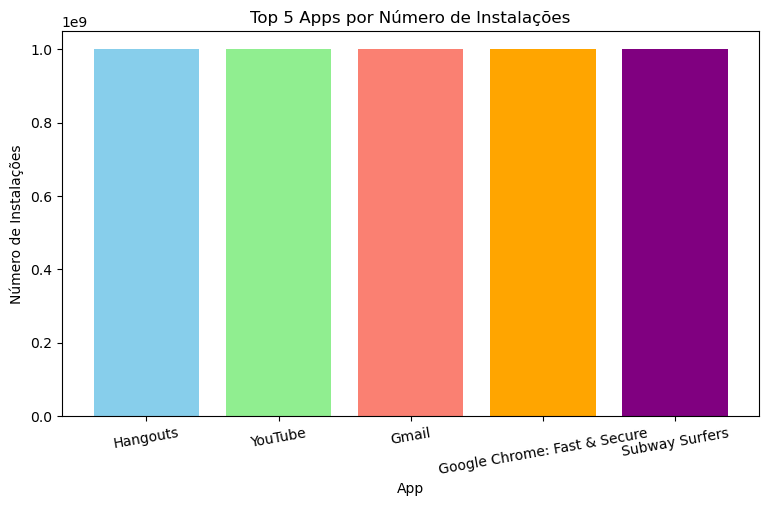

In [5]:
import matplotlib.pyplot as plt

# Seleciona os 5 apps mais instalados
top_5_installs = df[['App', 'Installs']].sort_values(by='Installs', ascending=False).head(5)

# Lista de cores pra fica bonitinho kkk
cores = ['skyblue', 'lightgreen', 'salmon', 'orange', 'purple', 'forestgreen','blue', 'pink', 'aquamarine']

# Cria o gráfico de barras com cores diferentes para cada barra
plt.figure(figsize=(9, 5))
plt.bar(top_5_installs['App'], top_5_installs['Installs'], color=cores)
plt.xlabel('App')
plt.ylabel('Número de Instalações')
plt.title('Top 5 Apps por Número de Instalações')
plt.xticks(rotation=10)
plt.show()


# Pie Chart

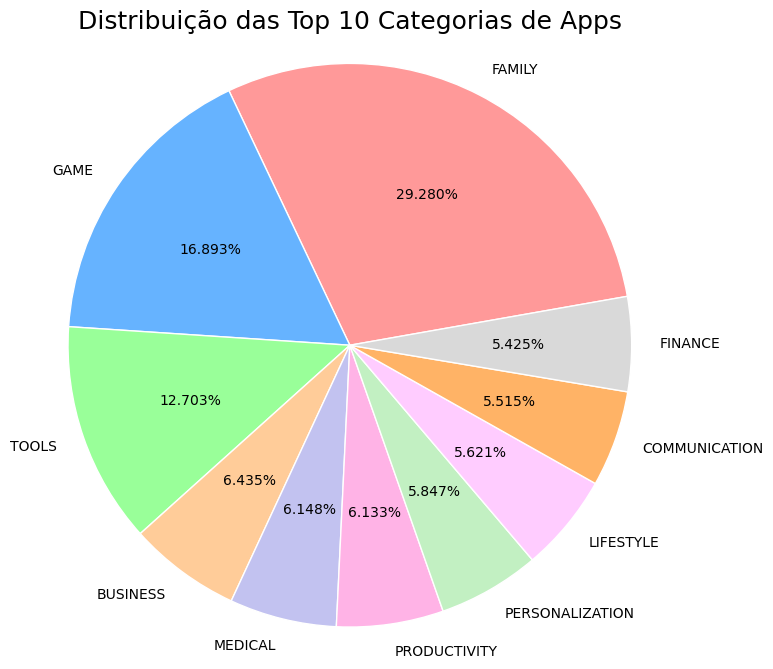

In [6]:

# Contar a frequência de cada categoria
categoria_frequencia = df['Category'].value_counts()

# Criar o gráfico de pizza
plt.figure(figsize=(8, 8))


cores = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c2f0c2', '#ffccff', '#ffb366', '#d9d9d9']

plt.pie(
    categoria_frequencia.head(10),
    labels=categoria_frequencia.index[:10],
    autopct='%1.3f%%',  # Formato percentual
    startangle=10,      # Iniciar o gráfico em um ângulo diferente
    colors=cores,       # Aplicar as cores do gráfico original
    wedgeprops=dict(edgecolor='white', linewidth=1)  # Bordas brancas
)

plt.title('Distribuição das Top 10 Categorias de Apps', fontsize=18)
plt.axis('equal')  # Garante que o gráfico tenha um formato circular

# Exibir o gráfico
plt.show()


# App mais caro

### removendo o símbolo de dólar ($) e convertendo os valores em números

In [7]:
# Remover o símbolo de dólar na coluna 'Price' e converter para float
df['Price'] = df['Price'].str.replace('$', '').astype(float)

# Encontrar o app com o preço mais alto
app_mais_caro = df[df['Price'] == df['Price'].max()]

# Mostrar o app mais caro
print("App mais caro:")
print(app_mais_caro[['App', 'Price']])


App mais caro:
                           App  Price
4367  I'm Rich - Trump Edition  400.0


# "Mature 17+"

In [14]:
# Convertendo a coluna para minúsculas para evitar problemas
df['Content Rating'] = df['Content Rating'].str.lower()

# Removendo duplicados
df = df.drop_duplicates()

# Filtrando e contando, removendo espaços em branco
mature_17 = df[df['Content Rating'] == 'mature 17+'].shape[0]

# Imprimindo o resultado
print(f"Total de aplicativos classificados como 'Mature 17+': {mature_17}")


Total de aplicativos classificados como 'Mature 17+': 393


# lista dos top 10 apps por número de reviews

In [15]:
# Remover duplicados com base na coluna 'App' (ou qualquer outra coluna que você deseje)
df = df.drop_duplicates(subset='App')

# Converter a coluna 'Reviews' para numérico
df['Reviews'] = pd.to_numeric(df['Reviews'], errors='coerce')

# Ordenar os apps pelo número de reviews em ordem decrescente
top_10_reviews = df[['App', 'Reviews']].sort_values(by='Reviews', ascending=False).head(10)

# Mostrar o top 10 apps e o número de reviews
print("Top 10 aplicativos por número de reviews:")
print(top_10_reviews)


Top 10 aplicativos por número de reviews:
                                                    App   Reviews
2544                                           Facebook  78158306
336                                  WhatsApp Messenger  69119316
2545                                          Instagram  66577313
335            Messenger – Text and Video Chat for Free  56642847
1670                                     Clash of Clans  44891723
4005            Clean Master- Space Cleaner & Antivirus  42916526
1654                                     Subway Surfers  27722264
3665                                            YouTube  25655305
7536  Security Master - Antivirus, VPN, AppLock, Boo...  24900999
1660                                       Clash Royale  23133508


# 10 apps com maior média de avaliação 

In [16]:
# Remover apps com valores nulos na coluna 'Rating'
df_rating_clean = df.dropna(subset=['Rating'])

# Ordenar os apps pela média de avaliação em ordem decrescente
top_10_ratings = df_rating_clean[['App', 'Rating']].sort_values(by='Rating', ascending=False).head(10)

# Mostrar o top 10 apps com melhor avaliação
print("Top 10 aplicativos com as melhores avaliações:")
print(top_10_ratings)


Top 10 aplicativos com as melhores avaliações:
                                            App  Rating
5685         Jobs in Canada - Emplois au Canada     5.0
7164                             CD CHOICE TUBE     5.0
7195                                   CE Smart     5.0
7204  TI-84 CE Graphing Calculator Manual TI 84     5.0
9341                                   EG India     5.0
8063                    cx advance call blocker     5.0
7212                                  MCQ CE IT     5.0
8058                                 Oración CX     5.0
9365                       Eh Bee Wallpapers HD     5.0
7239                                    CF Life     5.0


# Barras Horizontais | Top 10 aplicativos com as melhores avaliações

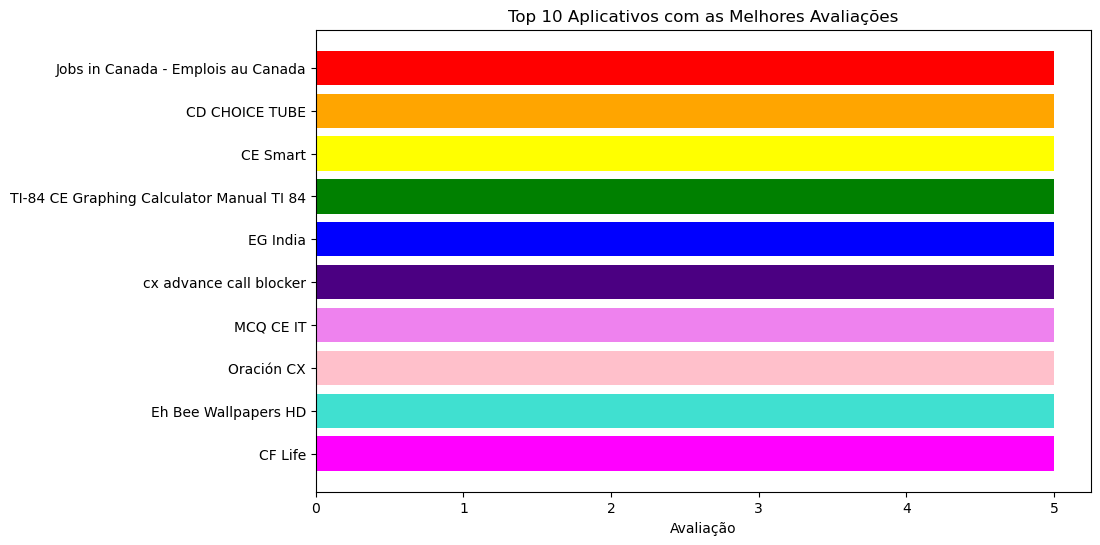

In [17]:
# Remover apps com valores nulos na coluna 'Rating'
df_rating_clean = df.dropna(subset=['Rating'])

# Ordenar os apps pela média de avaliação em ordem decrescente
top_10_ratings = df_rating_clean[['App', 'Rating']].sort_values(by='Rating', ascending=False).head(10)

rainbow_colors = ['Red', 'Orange', 'Yellow', 'Green', 'Blue', 'Indigo', 'Violet', 'Pink', 'Turquoise', 'Magenta']


# Criar o gráfico
plt.figure(figsize=(10, 6))
plt.barh(top_10_ratings['App'], top_10_ratings['Rating'], color = rainbow_colors )
plt.xlabel('Avaliação')
plt.title('Top 10 Aplicativos com as Melhores Avaliações')
plt.gca().invert_yaxis()  # Inverter o eixo y para mostrar o maior primeiro
plt.show()

# Média geral de preço dos apps pagos (formato de valor)

In [18]:
# Filtrar apenas os apps pagos (Price > 0)
apps_pagos = df[df['Price'] > 0]

# Calcular a média de preço dos apps pagos
media_preco_apps_pag = apps_pagos['Price'].mean()

# Mostrar a média de preço dos apps pagos
print(f"Média de preço dos aplicativos pagos: ${media_preco_apps_pag:.2f}")


Média de preço dos aplicativos pagos: $14.05


# Disperção | apps pagos |

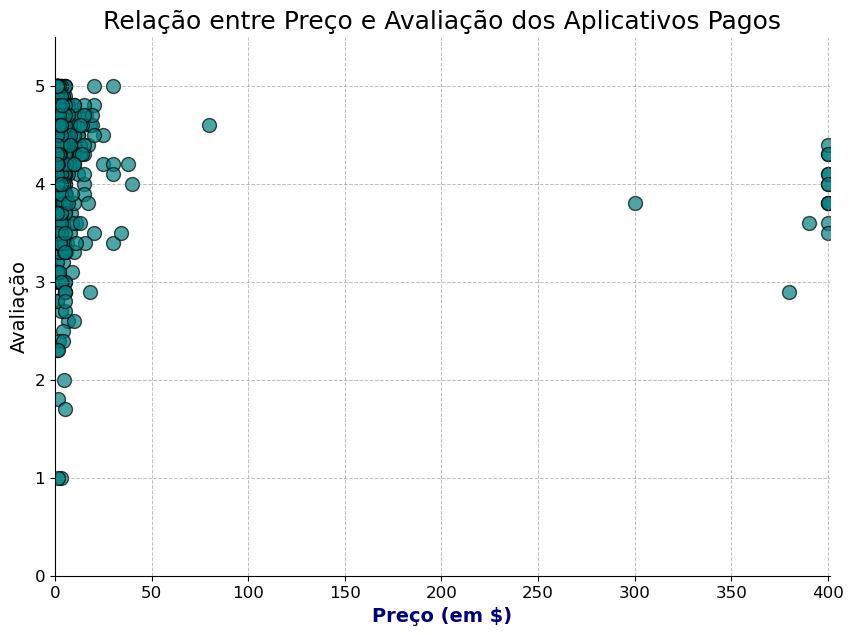

In [19]:
# Tamanho da figura
plt.figure(figsize=(10, 7))

# deixando bonitinho plot com cor e transparência
plt.scatter(apps_pagos['Price'], apps_pagos['Rating'], alpha=0.7, color='teal', edgecolor='black', s=100)

# Adicionando título e rótulos com formatação
plt.title('Relação entre Preço e Avaliação dos Aplicativos Pagos', fontsize=18)
plt.xlabel('Preço (em $)', fontsize=14, fontweight='bold', color='navy')
plt.ylabel('Avaliação', fontsize=14)

# Configurando os limites dos eixos
plt.xlim(0, apps_pagos['Price'].max() + 1)  # Um pouco de margem
plt.ylim(0, 5.5)  # Supondo que a avaliação seja de 0 a 5

# Melhorando a grade
plt.grid(color='gray', linestyle='--', linewidth=0.7, alpha=0.5)

# Personalizando os ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Removendo os spines (bordas) do gráfico
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Exibir o gráfico
plt.show()